<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/rmastand/02_intro_to_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Here are some necessary packages that we need to import to run this notebook

import numpy as np
import matplotlib.pyplot as plt
plt. rcParams["figure.figsize"] = (10, 6)

from google.colab import drive 
drive.mount("/content/drive/")

import os
os.chdir("/content/drive/My Drive/DSECOP/Colab Notebooks/")
!pwd

Mounted at /content/drive/
/content/drive/My Drive/DSECOP/Colab Notebooks


# Curve Fitting

In this notebook, we'll learn how to *curve fit* a function to a histogram of a dataset. Finding a function that closely resembles a given histogram will provide information on the underlying model tha[link text](https://)t governs the data.

By binning a dataset into a histogram, we effectively reduce the dimension of the dataset from $N$ (the number of observables taken) to the number of bins that we choose for the histogram $I = \sum i$ (recall that in the last notebook, we introduced $i$ as an index over bins). Now, instead of trying to understand each observation made in isolation, we only have to understand $I$ more meaningful numbers that represent the probability distribution of the observations.

However, maybe we want to reduce the dimension of the dataset even further. Perhaps we only care about the mean value of the observables, or their standard deviation. Or, perhaps we're deciding between two theories that predict different analytic models that describe the distribution of observables, and we want to determine which analytic model is a better fit to the data. 

To do this, we'll need to *curve fit* our data.

Let's continue to analyze the Uranium-234 sample you were given. 

You know that radioactive decay processes can be modeled by Poisson processes. 

$$p_{\lambda}(n) = \frac{\lambda^n e^{-\lambda}}{n!} $$

**Activity:** Write a function that plots a Poisson distribution. Plot it for a range of $\lambda$.

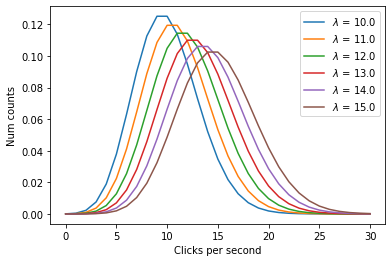

In [ ]:
n_vals = np.linspace(0, 30, 31)

def poisson(n, l):

  return [(l**x)*np.exp(-l) / np.math.factorial(x) for x in n]

plt.figure()
for l in np.linspace(10,15,6):
  plt.plot(n_vals, poisson(n_vals, l), label = "$\lambda$ = "+str(l))
plt.legend()

plt.xlabel("Clicks per second")
plt.ylabel("Num counts")
plt.show()


## Curve fitting determines model parameters

When we curve fit a function to a distribution of data, we need to first choosen an analytic model that we think could represent the underlying data. The curve fitting procedure then determines the exact values for the parameters of the model that best align with the data. 

In the example of Uranium-234, we know that the counts per minute can be described by a Poisson distribution. So there is one free parameter $\lambda$ that curve fitting will help determine. More generally, we might have to curve fit for a number of parameters $\Theta$. (For example, a simple gaussian cirve already has 2 parameters, mean $\mu$ and standard deviation $\sigma$.)

In essense, these are the steps we want to execute:

1. Create a histogram a given dataset with a bin choice $b_i$. The histogram produces a list of counts in each bin, $n_i$.

2. Define a function $f(b_i, \Theta)$ to fit to the histogram. This function will be calculated at the center of each bin to produce a list of the same length of $n_i$.

3. Select a trial value for the fit parameter(s) $\Theta_{\textrm{trial}}$. Calculate the numbers $f(b_i, \Theta_{\textrm{trial}})$.

4. Calculate the *loss* between the two sets of numbers $f(b_i, \Theta_{\textrm{trial}})$ (the trial fit function) and $n_i$ (the data).

4. Repeat steps 3 and 4 for a range of $\Theta_{\textrm{trial}}$ values. 

5. Select the $\Theta_{\textrm{trial}}$ that minimizes the loss. This will produce the best-fitting function to the data.





### Choosing a loss function

We haven't been very specific as to what the actual loss function is. In fact, many such loss functions exist! The only requirements on loss functions are that they are small when the fit function closely matches the distribution of observables, and large otherwise.

Probably the most well-known loss function is the *mean-squared error*. 

$$\mathcal{L}_{MSE}(\Theta) = \frac{\sum_i (n_i - f(b_i, \Theta))^2}{\textrm{num. bins}}.$$

Another relatively common loss function is the *mean-absolute error*

$$\mathcal{L}_{MAE}(\Theta) = \frac{\sum_i |n_i - f(b_i, \Theta)|}{\textrm{num. bins}}.$$

This function might be preferred over the mean-squared error to deemphasize outliers.

Other more niche loss functions exist.

**Activity**: Write a function to calculate the least square loss given a set of histogrammed counts ```obs_vals``` and a set of fit values ```fit_vals```.

In [ ]:
def least_sq_loss(obs_vals, fit_vals):

  loss = 0

  for i in range(len(obs_vals)):
    loss += (obs_vals[i] - fit_vals[i])**2

  return loss / len(obs_vals)

**Activity**: Read in the dataset ```counts_dataset_01.txt``` and histogram it. Calculate the loss between the histogram and a Poisson distribution for a range of trial $\lambda$'s, and find the lambda that minimizes the loss. Also provide a plot of the loss for each lambda.

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5]


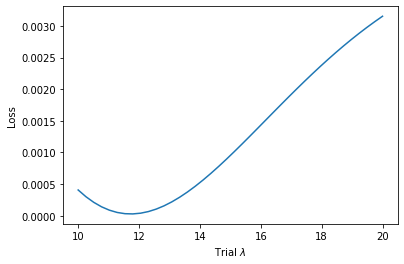

Value of $\lambda$ that minimizes the loss: 11.794871794871796


In [ ]:
# First histogram the data

dataset_location = "counts_dataset_00.txt"

def read_in_dataset(file_loc):

  with open(file_loc, "r") as infile:
    dataset = infile.read().split(",")
    num_clicks_per_minute = np.array([int(x) for x in dataset if x != " "])

    return num_clicks_per_minute

num_clicks_per_minute = read_in_dataset(dataset_location)

clicks_per_minute_bin_edges = np.linspace(-.5,30.5,32)
clicks_per_minute_bin_centers = 0.5*(clicks_per_minute_bin_edges[1:]+clicks_per_minute_bin_edges[:-1])

  # We're using np.histogram() here as we don't necessarily need to see the plot of the histogram
n_i, bins = np.histogram(num_clicks_per_minute, clicks_per_minute_bin_edges, density = "True")

# Determine what values of the Poisson parameter $\lambda$ to trial
trial_lam_vals = np.linspace(10,20,40)
trial_losses = []

# For every trial value $\lambda$, calculate the loss between the observed data and the corresponding trial Poisson fit function
for trial_lam in trial_lam_vals:

  fit_vals = list(poisson(clicks_per_minute_bin_centers, trial_lam))
  trial_loss = least_sq_loss(n_i, fit_vals)
  trial_losses.append(trial_loss)
  
#  Plot the losses as a function of the trial $\lambda$'s
plt.figure()
plt.plot(trial_lam_vals, trial_losses)
plt.xlabel("Trial $\lambda$")
plt.ylabel("Loss")
plt.show()

# Determine the $\lambda$ that minimizes the loss 
min_lambda = trial_lam_vals[np.where(trial_losses == np.min(trial_losses))][0]
print("Value of $\lambda$ that minimizes the loss:", min_lambda)


**Activity:** Plot the fit function and the data


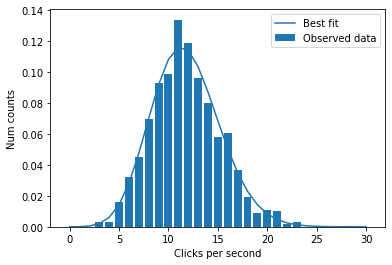

In [ ]:
plt.figure()
plt.bar(clicks_per_minute_bin_centers, n_i, label = "Observed data")
plt.plot(clicks_per_minute_bin_centers, poisson(clicks_per_minute_bin_centers, min_lambda), label = "Best fit")

plt.legend()

plt.xlabel("Clicks per second")
plt.ylabel("Num counts")
plt.show()

### Built-in functions to curve fit

As is the case with most common tasks, there are a number of curve fitting packages that are more efficient than anything we could write. One such package is ```scipy.optimize.curve_fit()```.

The function takes three main arguments: 

1. ```f```: the analytic function that you want to curve fit to. The function itself must be of the form ```f(data, params)``` (i.e. the first argument must be the observable)
2. ```xdata```: a ```np.array``` or ```list``` containing the $x$-axis values that you want to include in the fit. This should be equal to the bin centers of your histogrammed data.
3. ```ydata```: a ```np.array``` or ```list``` of the historam counts $n_i$

You can read more about ```scipy.optimize.curve_fit()``` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).


**Activity:** Use ```scipy.optimize.curve_fit()``` to 

*Note* scipy returns pcov. If you want to know more abou that, see the next notebook




[11.72644192]


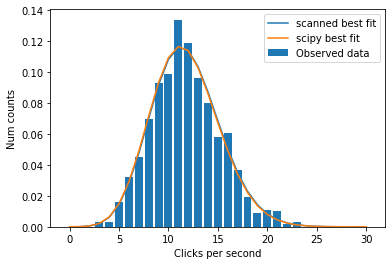

In [ ]:
from scipy.optimize import curve_fit


popt, pcov = curve_fit(poisson, clicks_per_minute_bin_centers, n_i)
print(popt)



plt.figure()
plt.bar(clicks_per_minute_bin_centers, n_i, label = "Observed data")
plt.plot(clicks_per_minute_bin_centers, poisson(clicks_per_minute_bin_centers, min_lambda) , label = "scanned best fit")
plt.plot(clicks_per_minute_bin_centers, poisson(clicks_per_minute_bin_centers, *popt), label = "scipy best fit")

plt.legend()

plt.xlabel("Clicks per second")
plt.ylabel("Num counts")
plt.show()